# MNIST with Multi-Layer Perceptron

We will look at the MNIST dataset, which is a dataset of handwritten digits. We will build a multi-layer perceptron (deep learning model) based on this data.

In [64]:
import tensorflow as tf

In [65]:
from tensorflow.examples.tutorials.mnist import input_data

In [66]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [67]:
# mnist is stored as a special tensorflow dataset object
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [68]:
# numpy array
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [69]:
mnist.train.images.shape

(55000, 784)

There are non-zero decimal numbers in this numpy array. They represent the darkness of the pixels in a certain array.

In [70]:
mnist.train.images[2].reshape(28, 28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [71]:
sample = mnist.train.images[2].reshape(28, 28)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

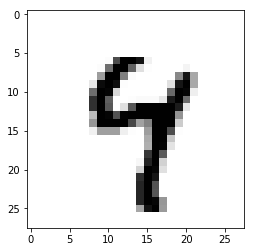

In [73]:
# imshow() will show a a two dimensional matrix based off some color scale
plt.imshow(sample, cmap='Greys')

Define some parameters:

In [74]:
# Describes how quickly we handle the cost function
# How quickly we want to apply the optimization function
# Lower rate -> higher possibility for accurate training results at the cost of longer computation time
learning_rate = 0.001

# How many training cycles we will go through
training_epocs = 15

# Size of the batches of training data
batch_size = 100

In [75]:
# Network parameters that directly define what our neural network will look like 
n_classes = 10
n_samples = mnist.train.num_examples

In [76]:
# What we expect the input to look like
# We're dealing with 28x28 arrays, but we're dealing with a flattened version
n_input = 784

In [77]:
# Choose how many neurons we want in the 2 hidden layers
n_hidden_1 = 256
n_hidden_2 = 256

First, we recieve the input data array and send it to the first hidden layer. Then, the data will begin to have a weight attached to it between the layers. We will also add a bias. Then, this cycle continues to the next hidden layer until the final output layer. 

More hidden layers means the model will take longer to run, but it will also be more accurate.

One the transformed data that has been multiplied by these weights has reached the output layer, we need to evaluate it. We will use a loss function (cost function) to evaluate how far off we are from the desired result (How many classes did we get correct?). We will apply an optimization function to try and minimize the cost by adjusting the weight values accordingly across the entire network (Adam Optimizer).

In [78]:
# Function for our multi-layer perceptron
def multilayer_perceprton(x, weights, biases):
    """
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: Dict of bias values
    """
    # First hidden layer with RELU Activation
    # Use matrix multiplication on weights and x, then add in the bias (X * W + B)
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(X * W + B) = RELU -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

Tensorflow has a graph object that can become aware of all the states of the variables. A variable is a modifiable tensor living in tensorflow's graph interacting operations. It can be used and modified by the computation. Generally, the model parameters are variables, so we wil use `tf.Variable`.

In [79]:
weights = {
    # Matrix of normally distributed random values 
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [80]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [81]:
# Set 2 placeholders for x and y
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [82]:
# Construct the model
pred = multilayer_perceprton(x, weights, biases)

In [83]:
# Define out cost and optimization functions
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

We will now train the model:

In [90]:
# Pass in a number, and it will return a tuple of a batch of n samples of the training data (10 in this case)
# It produces n samples of training data
t = mnist.train.next_batch(1)

In [91]:
# The tuple has length 2
len(t)

2

In [92]:
# An element in the tuple has length n (here, n = 1)
# This element is a numpy array
len(t[0])

1

In [93]:
t[0].shape

(1, 784)

Example of `mnist.train.next_batch()`:

In [94]:
# Xsamp is a sample
# ysame is the actual label
Xsamp, ysamp = t

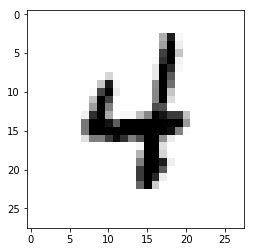

In [95]:
plt.imshow(Xsamp.reshape(28, 28), cmap='Greys')

Back to training the model and running the session:

In [96]:
# Lauch an interactive session. We don't need to use a context manager in this case.
sess = tf.InteractiveSession()

In [97]:
# Initialize all the variables
init = tf.initialize_all_variables()

In [98]:
sess.run(init)

In [99]:
# Train the model
# Recall: training_epochs = 5
for epoch in range(training_epocs):
    # Cost
    avg_cost = 0.0
    
    # Get the actual batch size
    total_batch = int(n_samples / batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size) # batch_size = 100
        
        # Use the feed_dict for the optimization and loss values
        # Use an underscore when you don't need a value when tuple unpacking
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        
        # Compute the average loss
        avg_cost += c / total_batch
        
    print('Epoch: {}, Cost: {:.4f}'.format(epoch+1, avg_cost))

print('Model has completed {} Epochs of training.'.format(training_epocs))

Epoch: 1, Cost: 173.4777
Epoch: 2, Cost: 42.3939
Epoch: 3, Cost: 26.6762
Epoch: 4, Cost: 18.7960
Epoch: 5, Cost: 13.5797
Epoch: 6, Cost: 10.1510
Epoch: 7, Cost: 7.6300
Epoch: 8, Cost: 5.7487
Epoch: 9, Cost: 4.3363
Epoch: 10, Cost: 3.3723
Epoch: 11, Cost: 2.6040
Epoch: 12, Cost: 1.9242
Epoch: 13, Cost: 1.5034
Epoch: 14, Cost: 1.1652
Epoch: 15, Cost: 0.9944
Model has completed 15 Epochs of training.


Evaluate the model: 

In [100]:
# Check how many predictions are equal to the test
# tf.equal() is essentially an equal check. It returns a boolean array of where x == y (element-wise)
# tf.argmax() returns the index with the largest value across axes of a tensor.
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [102]:
print(correct_predictions)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [103]:
# Use tf.cast() to cast our booleans back into a tensor of floating poinr values in order to get an average
correct_predictions = tf.cast(correct_predictions, 'float')

In [104]:
print(correct_predictions)

Tensor("Cast_2:0", shape=(?,), dtype=float32)


In [105]:
# Use a mean() function to grab the mean values across the tensor
accuracy = tf.reduce_mean(correct_predictions)

In [106]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [107]:
# Evaluate our accuracy
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [108]:
mnist.test.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [110]:
# Get our accuracy
accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

0.9447

This accuracy is good, but, with the advanced capabilities of deep learning and tensorflow, it could be much more accurate. Most real deep learning models use way more epochs, but they can take much longer too.